In [62]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import thinkstats2
import thinkplot
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf


#Creating dataframe for csv file
df = pd.read_csv("medicare-skilled-nursing-facility-snf-provider-aggregate-report-cy-2015.csv")
df.head() #Gives me the first 5 rows of the data but also shows all of the different variables I'd like to work with

,Provider ID,Facility Name,Street Address,City,State,Zip Code,Total_Stays,Distinct Beneficiaries Per Provider,ALOS,Total_SNF_Charge_Amount,...,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with Hypertension,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
0,10022,CHEROKEE MEDICAL CENTER,400 NORTHWOOD DR,CENTRE,AL,35960,95,85,13.9,3787309,...,39.0,52.0,45.0,74.0,NaN,55.0,14.0,72.0,11.0,7.0
1,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,20,19,10.6,436623,...,NaN,21.0,53.0,58.0,NaN,74.0,16.0,63.0,16.0,21.0
2,10044,MARION REGIONAL MEDICAL CENTER,1256 MILITARY STREET SOUTH,HAMILTON,AL,35570,164,144,15.4,5906115,...,44.0,42.0,50.0,72.0,NaN,62.0,16.0,60.0,10.0,13.0
3,10045,FAYETTE MEDICAL CENTER,1653 TEMPLE AVENUE NORTH,FAYETTE,AL,35555,124,110,16.0,2748027,...,42.0,34.0,38.0,71.0,NaN,58.0,13.0,75.0,15.0,16.0
4,10058,BIBB MEDICAL CENTER,208 PIERSON AVE,CENTREVILLE,AL,35042,90,85,17.4,1679414,...,34.0,40.0,56.0,65.0,NaN,45.0,11.0,59.0,11.0,20.0


In [63]:
#Creating separate dataframe for the top 10 richest states in the United States
dfrich = df[df["State"].isin(["NH", "MN", "HI", "ND", "MD", "UT", "VA", "MA", "WY", "VT"])]
dfrich.head()      

,Provider ID,Facility Name,Street Address,City,State,Zip Code,Total_Stays,Distinct Beneficiaries Per Provider,ALOS,Total_SNF_Charge_Amount,...,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with Hypertension,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
2760,125002,HILO MEDICAL CENTER,1190 WAIANUENUE AVENUE,HILO,HI,96720,59,51,16.7,1165413,...,27.0,22.0,45.0,75.0,NaN,55.0,16.0,27.0,6.0,27.0
2761,125004,GARDEN ISLE HEALTHCARE AND REHABILITATION CENTER,"3-3420 KUHIO HIGHWAY, SUITE 300",LIHUE,HI,96766,133,113,31.2,5924946,...,19.0,25.0,46.0,NaN,NaN,50.0,16.0,35.0,10.0,19.0
2762,125007,HALE MAKUA HEALTH SERVICES,472 KAULANA STREET,KAHULUI,HI,96732,103,96,21.2,1663236,...,17.0,26.0,43.0,71.0,NaN,41.0,26.0,39.0,5.0,26.0
2763,125009,MALUHIA,1027 HALA DRIVE,HONOLULU,HI,96817,34,33,20.6,707077,...,24.0,24.0,52.0,NaN,NaN,45.0,52.0,45.0,6.0,24.0
2764,125010,LEAHI HOSPITAL,3675 KILAUEA AVENUE,HONOLULU,HI,96816,50,47,19.4,789098,...,28.0,26.0,47.0,68.0,NaN,45.0,51.0,34.0,9.0,21.0


In [64]:
#Creating separate dataframe for the top 10 poverty states in the United States
dfpoverty = df[df["State"].isin(["MS", "NM", "LA", "KY", "WV", "AR", "AL", "TN", "AZ", "GA"])]
dfpoverty.head()

,Provider ID,Facility Name,Street Address,City,State,Zip Code,Total_Stays,Distinct Beneficiaries Per Provider,ALOS,Total_SNF_Charge_Amount,...,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with Hypertension,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
0,10022,CHEROKEE MEDICAL CENTER,400 NORTHWOOD DR,CENTRE,AL,35960,95,85,13.9,3787309,...,39.0,52.0,45.0,74.0,NaN,55.0,14.0,72.0,11.0,7.0
1,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,20,19,10.6,436623,...,NaN,21.0,53.0,58.0,NaN,74.0,16.0,63.0,16.0,21.0
2,10044,MARION REGIONAL MEDICAL CENTER,1256 MILITARY STREET SOUTH,HAMILTON,AL,35570,164,144,15.4,5906115,...,44.0,42.0,50.0,72.0,NaN,62.0,16.0,60.0,10.0,13.0
3,10045,FAYETTE MEDICAL CENTER,1653 TEMPLE AVENUE NORTH,FAYETTE,AL,35555,124,110,16.0,2748027,...,42.0,34.0,38.0,71.0,NaN,58.0,13.0,75.0,15.0,16.0
4,10058,BIBB MEDICAL CENTER,208 PIERSON AVE,CENTREVILLE,AL,35042,90,85,17.4,1679414,...,34.0,40.0,56.0,65.0,NaN,45.0,11.0,59.0,11.0,20.0


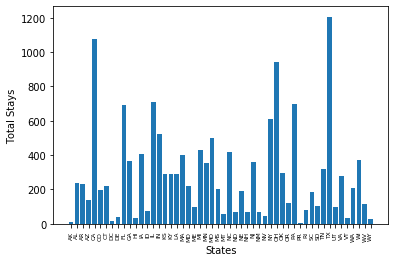

In [65]:
#Creating plot for Total Stays by state
dfstays = df[['State','Total_Stays']]
dfstays = dfstays.State.value_counts().sort_index() # group and count
dfstays = pd.DataFrame(dfstays) # convert series to dataframe again
dfstays = dfstays.reset_index() # reset index so columns match
dfstays.columns = ['State', 'Total_Stays'] # re-name the columns back
plt.bar(dfstays.State, dfstays.Total_Stays)
plt.xticks(rotation=90, fontsize=6)
plt.xlabel("States")
plt.ylabel("Total Stays")
plt.show()

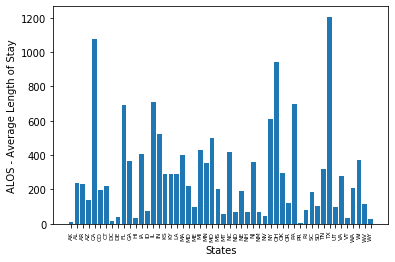

In [66]:
#Creating plot for ALOS (average length of stay) by state. I want to see what the average length of stay is by state to see if it varies.
dfALOS = df[['State','ALOS']]
dfALOS = dfALOS.State.value_counts().sort_index() # group and count
dfALOS = pd.DataFrame(dfALOS) # convert series to dataframe again
dfALOS = dfALOS.reset_index() # reset index so columns match
dfALOS.columns = ['State', 'ALOS'] # re-name the columns back
plt.bar(dfALOS.State, dfALOS.ALOS)
plt.xticks(rotation=90, fontsize=6)
plt.xlabel("States")
plt.ylabel("ALOS - Average Length of Stay")
plt.show()

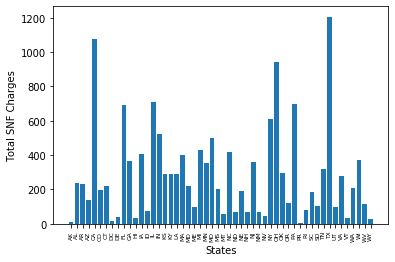

In [67]:
#Creating plot for total SNF Charge Amounts, which is the total charge amount for the SNF stay.
dftotalSNF = df[['State','Total_SNF_Charge_Amount']]
dftotalSNF = dftotalSNF.State.value_counts().sort_index() # group and count
dftotalSNF = pd.DataFrame(dftotalSNF) # convert series to dataframe again
dftotalSNF = dftotalSNF.reset_index() # reset index so columns match
dftotalSNF.columns = ['State', 'Total_SNF_Charge_Amount'] # re-name the columns back
plt.bar(dftotalSNF.State, dftotalSNF.Total_SNF_Charge_Amount)
plt.xticks(rotation=90, fontsize=6)
plt.xlabel("States")
plt.ylabel("Total SNF Charges")
plt.show()

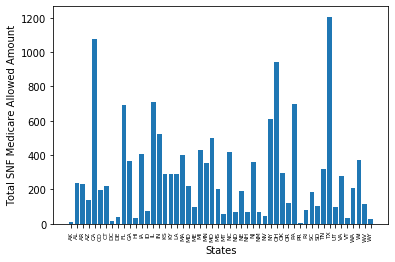

In [68]:
#Creating plot for total SNF Medicare Allowed Amounts or what Medicare usually allows amount wise for charges like these.
dfallowed = df[['State','Total_SNF_Medicare_Allowed_Amount']]
dfallowed = dfallowed.State.value_counts().sort_index() # group and count
dfallowed = pd.DataFrame(dfallowed) # convert series to dataframe again
dfallowed = dfallowed.reset_index() # reset index so columns match
dfallowed.columns = ['State', 'Total_SNF_Medicare_Allowed_Amount'] # re-name the columns back
plt.bar(dfallowed.State, dfallowed.Total_SNF_Medicare_Allowed_Amount)
plt.xticks(rotation=90, fontsize=6)
plt.xlabel("States")
plt.ylabel("Total SNF Medicare Allowed Amount")
plt.show()

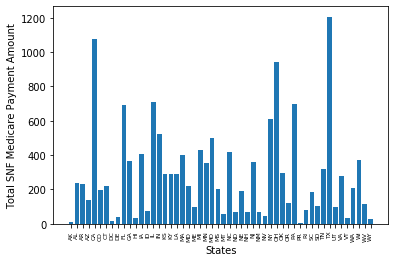

In [69]:
#Creating plot for total SNF Medicare Payment Amount - or what Medicare actually paid
dfmedpayamt = df[['State','Total_SNF_Medicare_Payment_Amount']]
dfmedpayamt = dfmedpayamt.State.value_counts().sort_index() # group and count
dfmedpayamt = pd.DataFrame(dfmedpayamt) # convert series to dataframe again
dfmedpayamt = dfmedpayamt.reset_index() # reset index so columns match
dfmedpayamt.columns = ['State', 'Total_SNF_Medicare_Payment_Amount'] # re-name the columns back
plt.bar(dfmedpayamt.State, dfmedpayamt.Total_SNF_Medicare_Payment_Amount)
plt.xticks(rotation=90, fontsize=6)
plt.xlabel("States")
plt.ylabel("Total SNF Medicare Payment Amount")
plt.show()

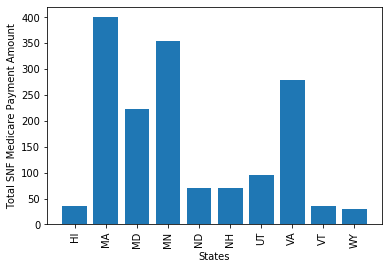

In [70]:
#Looking at Payments by State for the top 10 richest states
dfrichpay = dfrich[['State','Total_SNF_Medicare_Payment_Amount']]
dfrichpay = dfrichpay.State.value_counts().sort_index() # group and count
dfrichpay = pd.DataFrame(dfrichpay) # convert series to dataframe again
dfrichpay = dfrichpay.reset_index() # reset index so columns match
dfrichpay.columns = ['State', 'Total_SNF_Medicare_Payment_Amount'] # re-name the columns back
plt.bar(dfrichpay.State, dfrichpay.Total_SNF_Medicare_Payment_Amount)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("States")
plt.ylabel("Total SNF Medicare Payment Amount")
plt.show()

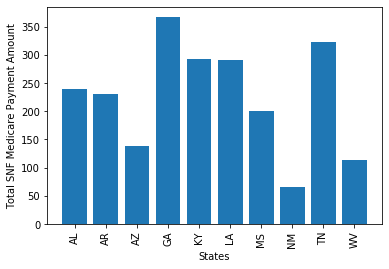

In [71]:
#Looking at Payments by State for the top 10 poorest states
dfpovpay = dfpoverty[['State','Total_SNF_Medicare_Payment_Amount']]
dfpovpay = dfpovpay.State.value_counts().sort_index() # group and count
dfpovpay = pd.DataFrame(dfpovpay) # convert series to dataframe again
dfpovpay = dfpovpay.reset_index() # reset index so columns match
dfpovpay.columns = ['State', 'Total_SNF_Medicare_Payment_Amount'] # re-name the columns back
plt.bar(dfpovpay.State, dfpovpay.Total_SNF_Medicare_Payment_Amount)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("States")
plt.ylabel("Total SNF Medicare Payment Amount")
plt.show()

In [83]:
#Now I want to find mean, mode, spread, and tails for each variable in my top 10 poverty states
#Finding the mean for each variable
mean1 = dfpoverty.ALOS.mean()
mean2 = dfpoverty.Total_Stays.mean()
mean3 = dfpoverty.Total_SNF_Charge_Amount.mean()
mean4 = dfpoverty.Total_SNF_Medicare_Allowed_Amount.mean()
mean5 =dfpoverty.Total_SNF_Medicare_Payment_Amount.mean()
print('Mean')
print('ALOS', mean1)
print('Total_Stays', mean2)
print('Total_SNF_Charge_Amount', mean3)
print('Total_SNF_Medicare_Allowed_Amount', mean4)
print('Total_SNF_Medicare_Payment_Amount', mean5)

#Finding the mode for each variable
mode1 =dfpoverty.ALOS.mode()
mode2 = dfpoverty.Total_Stays.mode()
mode3 = dfpoverty.Total_SNF_Charge_Amount.mode()
mode4 = dfpoverty.Total_SNF_Medicare_Allowed_Amount.mode()
mode5 = dfpoverty.Total_SNF_Medicare_Payment_Amount.mode()
print('Mode')
print('ALOS', mode1)
print('Total_Stays', mode2)
print('Total_SNF_Charge_Amount', mode3)
print('Total_SNF_Medicare_Allowed_Amount', mode4)
print('Total_SNF_Medicare_Payment_Amount', mode5)

#Finding the variance
var1 = dfpoverty.ALOS.var()
var2 = dfpoverty.Total_Stays.var()
var3 =dfpoverty.Total_SNF_Charge_Amount.var()
var4 = dfpoverty.Total_SNF_Medicare_Allowed_Amount.var()
var5 = dfpoverty.Total_SNF_Medicare_Payment_Amount.var()
print('Variance')
print('ALOS', var1)
print('Total_Stays', var2)
print('Total_SNF_Charge_Amount', var3)
print('Total_SNF_Medicare_Allowed_Amount', var4)
print('Total_SNF_Medicare_Payment_Amount', var5)

#Finding the standard deviation
std1 = dfpoverty.ALOS.std()
std2 = dfpoverty.Total_Stays.std()
std3 = dfpoverty.Total_SNF_Charge_Amount.std()
std4 = dfpoverty.Total_SNF_Medicare_Allowed_Amount.std()
std5 = dfpoverty.Total_SNF_Medicare_Payment_Amount.std()
print('Standard Deviation')
print('ALOS', std1)
print('Total_Stays', std2)
print('Total_SNF_Charge_Amount', std3)
print('Total_SNF_Medicare_Allowed_Amount', std4)
print('Total_SNF_Medicare_Payment_Amount', std5)

Mean
ALOS 28.398583444001787
Total_Stays 152.5303231518371
Total_SNF_Charge_Amount 2554947.0305444887
Total_SNF_Medicare_Allowed_Amount 1798458.7853032316
Total_SNF_Medicare_Payment_Amount 1433852.9008410801
Mode
ALOS 0    24.7
dtype: float64
Total_Stays 0    54
dtype: int64
Total_SNF_Charge_Amount 0    1285345
dtype: int64
Total_SNF_Medicare_Allowed_Amount 0          16713
1          24157
2          25086
3          27123
4          30096
          ...   
2254    10322231
2255    10330877
2256    10425552
2257    10978830
2258    11083312
Length: 2259, dtype: int64
Total_SNF_Medicare_Payment_Amount 0         16713
1         18156
2         22221
3         24157
4         27123
         ...   
2254    8516394
2255    9064054
2256    9492223
2257    9816552
2258    9855252
Length: 2259, dtype: int64
Variance
ALOS 68.77578187201979
Total_Stays 15736.384708974409
Total_SNF_Charge_Amount 5623483212041.551
Total_SNF_Medicare_Allowed_Amount 2020443323151.9412
Total_SNF_Medicare_Payment_Amou

In [73]:
#Now I want to find mean, mode, spread, and tails for each variable in my top 10 richest states dataframe
mean1 = dfrich.ALOS.mean()
mean2 = dfrich.Total_Stays.mean()
mean3 = dfrich.Total_SNF_Charge_Amount.mean()
mean4 = dfrich.Total_SNF_Medicare_Allowed_Amount.mean()
mean5 =dfrich.Total_SNF_Medicare_Payment_Amount.mean()
print('Mean')
print('ALOS', mean1)
print('Total_Stays', mean2)
print('Total_SNF_Charge_Amount', mean3)
print('Total_SNF_Medicare_Allowed_Amount', mean4)
print('Total_SNF_Medicare_Payment_Amount', mean5)

#Finding the mode for each variable
mode1 =dfrich.ALOS.mode()
mode2 = dfrich.Total_Stays.mode()
mode3 = dfrich.Total_SNF_Charge_Amount.mode()
mode4 = dfrich.Total_SNF_Medicare_Allowed_Amount.mode()
mode5 = dfrich.Total_SNF_Medicare_Payment_Amount.mode()
print('Mode')
print('ALOS', mode1)
print('Total_Stays', mode2)
print('Total_SNF_Charge_Amount', mode3)
print('Total_SNF_Medicare_Allowed_Amount', mode4)
print('Total_SNF_Medicare_Payment_Amount', mode5)

#Finding the variance
var1 = dfrich.ALOS.var()
var2 = dfrich.Total_Stays.var()
var3 = dfrich.Total_SNF_Charge_Amount.var()
var4 = dfrich.Total_SNF_Medicare_Allowed_Amount.var()
var5 = dfrich.Total_SNF_Medicare_Payment_Amount.var()
print('Variance')
print('ALOS', var1)
print('Total_Stays', var2)
print('Total_SNF_Charge_Amount', var3)
print('Total_SNF_Medicare_Allowed_Amount', var4)
print('Total_SNF_Medicare_Payment_Amount', var5)

#Finding the standard deviation
std1 = dfrich.ALOS.std()
std2 = dfrich.Total_Stays.std()
std3 = dfrich.Total_SNF_Charge_Amount.std()
std4 = dfrich.Total_SNF_Medicare_Allowed_Amount.std()
std5 = dfrich.Total_SNF_Medicare_Payment_Amount.std()
print('Standard Deviation')
print('ALOS', std1)
print('Total_Stays', std2)
print('Total_SNF_Charge_Amount', std3)
print('Total_SNF_Medicare_Allowed_Amount', std4)
print('Total_SNF_Medicare_Payment_Amount', std5)

Mean
ALOS 24.930276381909586
Total_Stays 193.61934673366835
Total_SNF_Charge_Amount 3200958.601130653
Total_SNF_Medicare_Allowed_Amount 2337887.547110553
Total_SNF_Medicare_Payment_Amount 1964713.5207286433
Mode
ALOS 0    27.9
dtype: float64
Total_Stays 0    41
dtype: int64
Total_SNF_Charge_Amount 0          32780
1          44337
2          59149
3          77947
4          84276
          ...   
1587    19085617
1588    19426218
1589    19544559
1590    19571989
1591    23666596
Length: 1592, dtype: int64
Total_SNF_Medicare_Allowed_Amount 0           8085
1           8537
2          26477
3          28722
4          33374
          ...   
1587    11917089
1588    12662118
1589    13902992
1590    15009583
1591    22239707
Length: 1592, dtype: int64
Total_SNF_Medicare_Payment_Amount 0           7298
1           7907
2          24803
3          26477
4          31824
          ...   
1587    10092348
1588    10601050
1589    11780535
1590    12520840
1591    18128340
Length: 1592, dtyp

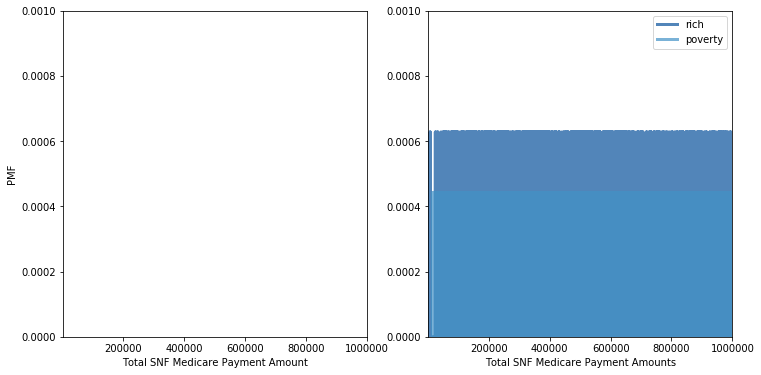

<Figure size 576x432 with 0 Axes>

In [74]:
#Create a PMF that compares two variables against each other. For this I'm going to look at SNF Medicare Payment Amount and compare my top 10 richest states agianst my top 10 poorest states
rich_hist = thinkstats2.Hist(dfrich.Total_SNF_Medicare_Payment_Amount)
poverty_hist = thinkstats2.Hist(dfpoverty.Total_SNF_Medicare_Payment_Amount)

width = 0.1
axis = [900, 1000000, 0, 0.001] #Messed with axis settings and this was the best I could get
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(rich_hist, align='right', width=width)
thinkplot.Hist(poverty_hist, align='left', width=width)
thinkplot.Config(xlabel='Total SNF Medicare Payment Amount', ylabel='PMF', axis=axis)

rich_pmf = thinkstats2.Pmf(dfrich.Total_SNF_Medicare_Payment_Amount, label='rich')
poverty_pmf = thinkstats2.Pmf(dfpoverty.Total_SNF_Medicare_Payment_Amount, label='poverty')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([rich_pmf, poverty_pmf])
thinkplot.Show(xlabel='Total SNF Medicare Payment Amounts', axis=axis)

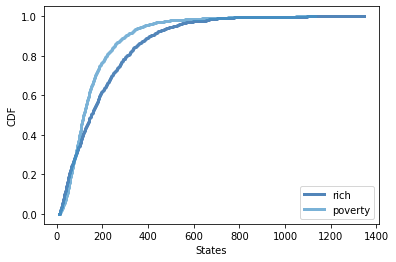

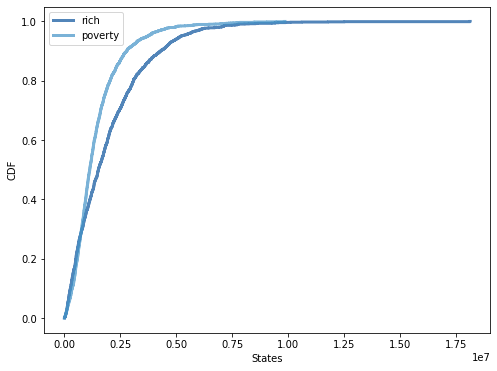

<Figure size 576x432 with 0 Axes>

In [75]:
#Create a CDF for Total Stays
rich_cdf1 = thinkstats2.Cdf(dfrich.Total_Stays, label = 'rich')
poverty_cdf1 = thinkstats2.Cdf(dfpoverty.Total_Stays, label = 'poverty')

thinkplot.PrePlot(2)
thinkplot.Cdfs([rich_cdf1, poverty_cdf1])
thinkplot.Show(xlabel = 'States', ylabel = 'CDF')

 #Create a CDF for total SNF Medicare Payments
rich_cdf2 = thinkstats2.Cdf(dfrich.Total_SNF_Medicare_Payment_Amount, label = 'rich')
poverty_cdf2 = thinkstats2.Cdf(dfpoverty.Total_SNF_Medicare_Payment_Amount, label = 'poverty')

thinkplot.PrePlot(2)
thinkplot.Cdfs([rich_cdf2, poverty_cdf2])
thinkplot.Show(xlabel = 'States', ylabel = 'CDF')

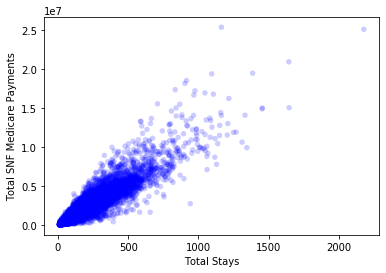

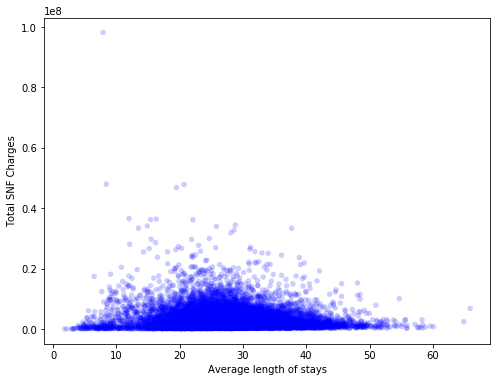

<Figure size 576x432 with 0 Axes>

In [76]:
#Create two scatter plots comparing two variables
thinkplot.Scatter(df.Total_Stays, df.Total_SNF_Medicare_Payment_Amount)
thinkplot.Show(xlabel = 'Total Stays', ylabel = 'Total SNF Medicare Payments')

thinkplot.Scatter(df.ALOS, df.Total_SNF_Charge_Amount)
thinkplot.Show(xlabel = 'Average length of stays', ylabel = 'Total SNF Charges')

In [85]:
stays = df.Total_Stays
payment = df.Total_SNF_Medicare_Payment_Amount
alos = df.ALOS
charges = df.Total_SNF_Charge_Amount

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
#Define Pearson's Correlation page 85 from the book
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
#Define Spearman's Correlation pg 87 from the book
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')
#Show the Pearson and Spearman correlation for Total SNF Medicare payments against total stays
print('Corr', Corr(stays, payment))
print('SpearmanCorr', SpearmanCorr(stays, payment))
print('Corr', Corr(alos, charges))
print('SpearmanCorr', SpearmanCorr(alos, charges))

Corr 0.923813174241657
SpearmanCorr 0.9432738926903175
Corr -0.08268280147548872
SpearmanCorr -0.0321250560528255


In [78]:
#Test hypothesis
#Testing whether there is a difference in payment between top 10 poverty states and top 10 richest states
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()
        
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
        
data = dfrich.Total_SNF_Medicare_Payment_Amount, dfpoverty.Total_SNF_Medicare_Payment_Amount

ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

#Output 0.0


0.0

In [79]:
#Looking at correlation between ALOS and payment amount
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    
cleaned = df.dropna(subset=['ALOS', 'Total_SNF_Medicare_Payment_Amount'])
data = cleaned.ALOS.values, cleaned.Total_SNF_Medicare_Payment_Amount.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

#Output 0.65

0.655

In [80]:
#Two sampled T-test found here: https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
rich_mean = dfrich.Total_SNF_Medicare_Payment_Amount.mean()
poverty_mean = dfpoverty.Total_SNF_Medicare_Payment_Amount.mean()

print("rich mean value:", rich_mean)
print("poverty mean value:", poverty_mean)

rich_std = dfrich.Total_SNF_Medicare_Payment_Amount.std()
poverty_std = dfpoverty.Total_SNF_Medicare_Payment_Amount.std()

print("rich std value:", rich_std)
print("poverty std value:", poverty_std)

ttest, pval = ttest_ind(dfrich.Total_SNF_Medicare_Payment_Amount, dfpoverty.Total_SNF_Medicare_Payment_Amount)
print("p-value", pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")
    
#p-value comes back as 1.181091692388514e-28, but that's significantly higher than my previous two tests. I could be doing something incorrect here or the variable isn't reliable. 

rich mean value: 1964713.5207286433
poverty mean value: 1433852.9008410801
rich std value: 1752957.284944927
poverty std value: 1189081.3214862961
p-value 1.181091692388514e-28
we reject null hypothesis


In [81]:
#Regression analysis
formula = ' Total_SNF_Medicare_Payment_Amount ~ State'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Total_SNF_Medicare_Payment_Amount   R-squared:                       0.189
Model:                                           OLS   Adj. R-squared:                  0.186
Method:                                Least Squares   F-statistic:                     68.40
Date:                               Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                                       16:52:50   Log-Likelihood:            -2.3656e+05
No. Observations:                              15026   AIC:                         4.732e+05
Df Residuals:                                  14974   BIC:                         4.736e+05
Df Model:                                         51                                         
Covariance Type:                           nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.769e+05   5.89e+05      1.659      0.097   -1.78e+05    2.13e+06
State[T.AL]  5.925e+05   5.99e+05      0.990      0.322   -5.81e+05    1.77e+06
State[T.AR]  9.137e+04   5.99e+05      0.152      0.879   -1.08e+06    1.27e+06
State[T.AZ]  1.117e+06   6.06e+05      1.844      0.065   -7.02e+04     2.3e+06
State[T.CA]  1.784e+06   5.91e+05      3.017      0.003    6.25e+05    2.94e+06
State[T.CO]  4.485e+05   6.01e+05      0.746      0.455   -7.29e+05    1.63e+06
State[T.CT]  1.391e+06   5.99e+05      2.321      0.020    2.16e+05    2.57e+06
State[T.DC]  1.413e+06   7.08e+05      1.996      0.046    2.57e+04     2.8e+06
State[T.DE]  1.937e+06   6.48e+05      2.988      0.003    6.66e+05    3.21e+06
State[T.FL]   2.13e+06   5.92e+05      3.596      0.000    9.69e+05    3.29e+06
State[T.GA]  3.972e+05   5.95e+05      0.667      0.505    -7.7e+05    1.56e+06
State[T.HI]  3.523e+05   6.51e+05      0.541      0.588   -9.24e+05    1.63e+06
State[T.IA]  -3.74e+05   5.95e+05     -0.629      0.529   -1.54e+06    7.92e+05
State[T.ID]  1.444e+05    6.2e+05      0.233      0.816   -1.07e+06    1.36e+06
State[T.IL]  1.141e+06   5.92e+05      1.927      0.054   -1.99e+04     2.3e+06
State[T.IN]  6.264e+05   5.93e+05      1.056      0.291   -5.37e+05    1.79e+06
State[T.KS] -1.055e+05   5.97e+05     -0.177      0.860   -1.28e+06    1.06e+06
State[T.KY]  3.981e+05   5.97e+05      0.667      0.505   -7.72e+05    1.57e+06
State[T.LA]  1.296e+05   5.97e+05      0.217      0.828   -1.04e+06     1.3e+06
State[T.MA]  1.211e+06   5.95e+05      2.036      0.042    4.52e+04    2.38e+06
State[T.MD]  2.248e+06   5.99e+05      3.750      0.000    1.07e+06    3.42e+06
State[T.ME]  1.817e+05   6.12e+05      0.297      0.767   -1.02e+06    1.38e+06
State[T.MI]  1.222e+06   5.94e+05      2.056      0.040    5.73e+04    2.39e+06
State[T.MN]  1.515e+05   5.96e+05      0.254      0.799   -1.02e+06    1.32e+06
State[T.MO] -1.136e+04   5.94e+05     -0.019      0.985   -1.18e+06    1.15e+06
State[T.MS]  4.728e+05   6.01e+05      0.787      0.431   -7.05e+05    1.65e+06
State[T.MT]  1.683e+05    6.3e+05      0.267      0.789   -1.07e+06     1.4e+06
State[T.NC]   8.11e+05   5.95e+05      1.364      0.173   -3.54e+05    1.98e+06
State[T.ND] -4.145e+05   6.21e+05     -0.667      0.505   -1.63e+06    8.03e+05
State[T.NE]  1.328e+04   6.01e+05      0.022      0.982   -1.17e+06    1.19e+06
State[T.NH]  1.166e+06   6.22e+05      1.876      0.061   -5.24e+04    2.38e+06
State[T.NJ]  3.054e+06   5.96e+05      5.129      0.000    1.89e+06    4.22e+06
State[T.NM]  4.527e+05   6.24e+05      0.726      0.468    -7.7e+05    1.68e+06
State[T.NV]  2.451e+06   6.39e+05     

In [82]:
#Multiple regression analysis using Payment to State along with Total Stays
formula = 'Total_SNF_Medicare_Payment_Amount ~ State + Total_Stays'
results = smf.ols(formula, data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Total_SNF_Medicare_Payment_Amount   R-squared:                       0.881
Model:                                           OLS   Adj. R-squared:                  0.881
Method:                                Least Squares   F-statistic:                     2141.
Date:                               Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                                       16:52:51   Log-Likelihood:            -2.2211e+05
No. Observations:                              15026   AIC:                         4.443e+05
Df Residuals:                                  14973   BIC:                         4.447e+05
Df Model:                                         52                                         
Covariance Type:                           nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -6.21e+04   2.25e+05     -0.276      0.783   -5.04e+05    3.79e+05
State[T.AL] -4.159e+05   2.29e+05     -1.817      0.069   -8.65e+05    3.28e+04
State[T.AR] -1.457e+05   2.29e+05     -0.636      0.525   -5.95e+05    3.03e+05
State[T.AZ] -1.922e+05   2.32e+05     -0.830      0.407   -6.46e+05    2.62e+05
State[T.CA]  8.316e+05   2.26e+05      3.679      0.000    3.89e+05    1.27e+06
State[T.CO] -2.364e+04    2.3e+05     -0.103      0.918   -4.74e+05    4.27e+05
State[T.CT]  2.541e+05   2.29e+05      1.109      0.268   -1.95e+05    7.03e+05
State[T.DC]  1.144e+05   2.71e+05      0.423      0.672   -4.16e+05    6.45e+05
State[T.DE]  1.509e+05   2.48e+05      0.609      0.543   -3.35e+05    6.37e+05
State[T.FL]  3.151e+04   2.27e+05      0.139      0.889   -4.13e+05    4.76e+05
State[T.GA] -1.061e+05   2.28e+05     -0.466      0.641   -5.52e+05     3.4e+05
State[T.HI]  2.649e+05   2.49e+05      1.064      0.287   -2.23e+05    7.53e+05
State[T.IA]  -1.27e+05   2.27e+05     -0.558      0.577   -5.73e+05    3.19e+05
State[T.ID] -8.482e+04   2.37e+05     -0.358      0.721    -5.5e+05     3.8e+05
State[T.IL]  1.649e+05   2.26e+05      0.728      0.467   -2.79e+05    6.09e+05
State[T.IN]  1.654e+05   2.27e+05      0.729      0.466   -2.79e+05     6.1e+05
State[T.KS] -1.459e+05   2.28e+05     -0.639      0.523   -5.93e+05    3.01e+05
State[T.KY] -2.335e+05   2.28e+05     -1.023      0.306   -6.81e+05    2.14e+05
State[T.LA] -3.411e+04   2.28e+05     -0.149      0.881   -4.81e+05    4.13e+05
State[T.MA]  -3.49e+04   2.27e+05     -0.153      0.878   -4.81e+05    4.11e+05
State[T.MD]  1.073e+05   2.29e+05      0.468      0.640   -3.42e+05    5.57e+05
State[T.ME] -2.325e+05   2.34e+05     -0.994      0.320   -6.91e+05    2.26e+05
State[T.MI] -8.991e+04   2.27e+05     -0.396      0.692   -5.35e+05    3.56e+05
State[T.MN] -1.923e+05   2.28e+05     -0.844      0.398   -6.39e+05    2.54e+05
State[T.MO] -1.877e+05   2.27e+05     -0.827      0.408   -6.33e+05    2.57e+05
State[T.MS] -3.921e+04    2.3e+05     -0.171      0.864   -4.89e+05    4.11e+05
State[T.MT] -1.185e+05   2.41e+05     -0.492      0.623   -5.91e+05    3.54e+05
State[T.NC]  -1.31e+05   2.27e+05     -0.576      0.564   -5.77e+05    3.15e+05
State[T.ND] -2.942e+05   2.38e+05     -1.239      0.215    -7.6e+05    1.71e+05
State[T.NE] -7.277e+04    2.3e+05     -0.317      0.752   -5.23e+05    3.78e+05
State[T.NH]  1.307e+05   2.38e+05      0.550      0.582   -3.35e+05    5.97e+05
State[T.NJ]  5.805e+05   2.28e+05      2.548      0.011    1.34e+05    1.03e+06
State[T.NM] -5.002e+04   2.38e+05     -0.210      0.834   -5.17e+05    4.17e+05
State[T.NV]  3.511e+05   2.44e+05     